# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_frame = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
combined_frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice = len(combined_frame["Mouse ID"].unique())
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df=pd.DataFrame(combined_frame)
duplicate_mice = df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
display(df[duplicate_mice]['Mouse ID'])

107     g989
137     g989
329     g989
360     g989
620     g989
681     g989
815     g989
869     g989
950     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
display(df[duplicate_mice])


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = combined_frame.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

#df_deduped = df.drop_duplicates(subset=['A'], keep='last')
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(clean_mice["Mouse ID"].unique())
number_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = clean_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_dataframe = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                                "Median Tumor Volume": median_tumor,
                                "Tumor Volume Variance":variance_tumor, 
                                 "Tumor Volume Std. Dev":std_tumor,
                                 "Tumor Volume Std. Err.":sem_tumor,})

summary_dataframe


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_summary = clean_mice.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem']})

aggregated_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

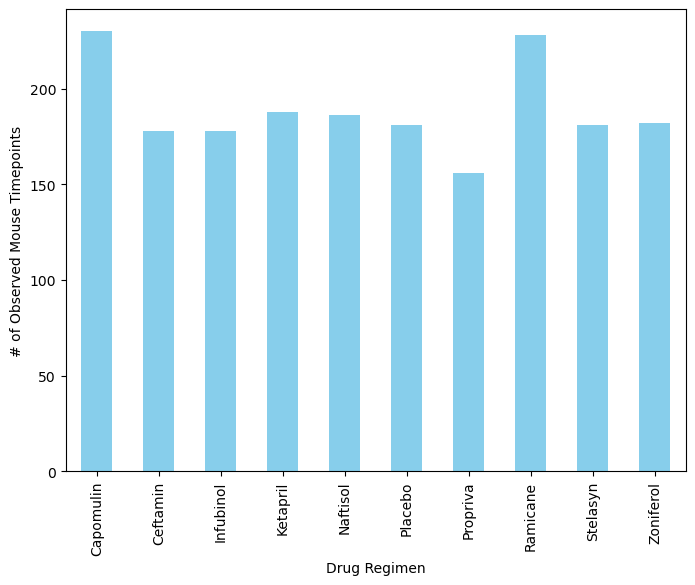

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_mice = clean_mice.groupby('Drug Regimen').count()
count_mice
bar_plot = count_mice['Mouse ID'].plot(kind='bar', color='skyblue',figsize=(8,6))
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('# of Observed Mouse Timepoints')


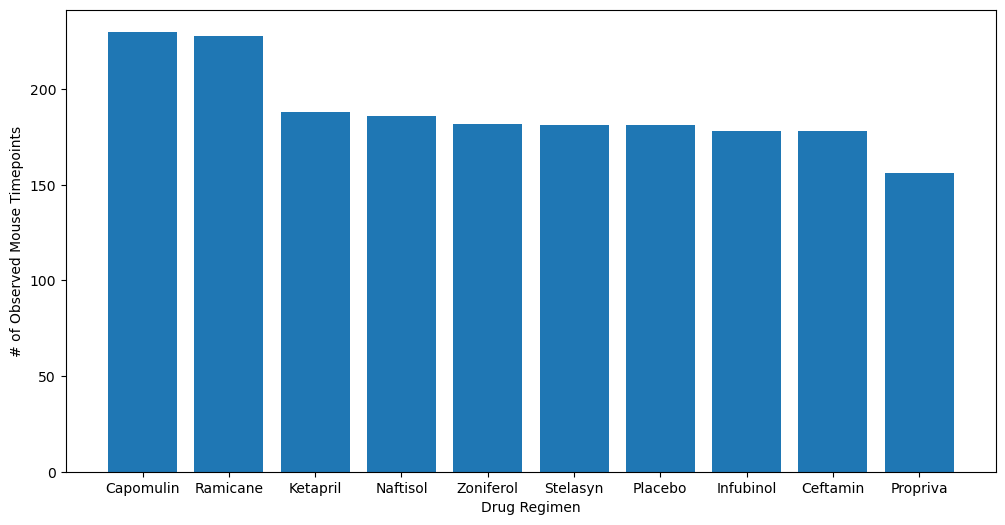

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

counts = clean_mice['Drug Regimen'].value_counts()
plt.figure(figsize=(12, 6))
y_axis = clean_mice['Mouse ID']
plt.bar(counts.index.values,counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()




<Axes: ylabel='Sex'>

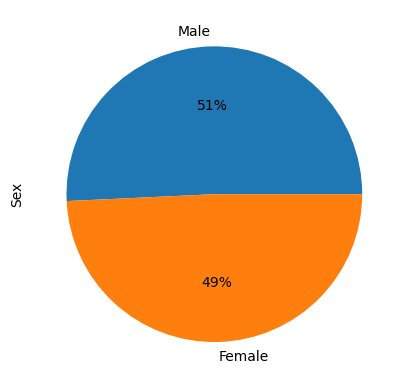

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex = clean_mice['Sex'].value_counts()

labels = ["Male", "Female"]

mice_sex.plot(kind='pie', y='Sex', title=None, labels=labels, ylabel= 'Sex', autopct='%1.00f%%')



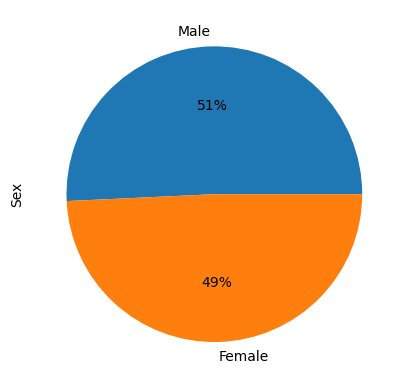

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_mice['Sex'].value_counts()

labels = ["Male", "Female"]

plt.pie(counts, explode=None, labels=labels, autopct="%1.00f%%", shadow=None, startangle=0)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

filtered_mouse = clean_mice[clean_mice['Timepoint'] == 45]
filtered_mouse_reduced = filtered_mouse[['Mouse ID','Tumor Volume (mm3)']]

#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_mice,filtered_mouse_reduced,how='inner',on='Mouse ID')
mereged_df_rename = merged_df.rename(columns={'Tumor Volume (mm3)_y': 'Final Tumor Volume (mm3)'})
mereged_df_rename

small_list = ["Capomulin", "Ramicane" , "Infubinol" , "Ceftamin"]

In [22]:
mereged_df_rename

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3)
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,38.982878
...,...,...,...,...,...,...,...,...,...
1295,m601,25,33.118756,1,Capomulin,Male,22,17,28.430964
1296,m601,30,31.758275,1,Capomulin,Male,22,17,28.430964
1297,m601,35,30.834357,1,Capomulin,Male,22,17,28.430964
1298,m601,40,31.378045,1,Capomulin,Male,22,17,28.430964


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
mereged_df_rename_V2 = mereged_df_rename[['Mouse ID','Drug Regimen', 'Final Tumor Volume (mm3)']]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_empty = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in small_list:
    treatment_clean = mereged_df_rename_V2.loc[mereged_df_rename_V2['Drug Regimen'] == treatment, 'Final Tumor Volume (mm3)']
    #print(treatment)
    #print(treatment_final)
    tumor_vol_empty.append(treatment_clean)
    print(f"{treatment}'s potential outliers:{lower_bound}")



    quartiles = treatment_clean.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    #print(f"The lower quartile of temperatures is: {lowerq}")
    #print(f"The upper quartile of temperatures is: {upperq}")
    #print(f"The interquartile range of temperatures is: {iqr}")
    #print(f"The the median of temperatures is: {quartiles[0.5]} ")
    #print("---------------------------------")
  
    

    # add subset 

    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.")


Capomulin's potential outliers:52.29350701999999
Ramicane's potential outliers:20.70456164999999
Infubinol's potential outliers:19.69048010125
Ceftamin's potential outliers:55.35777559500001


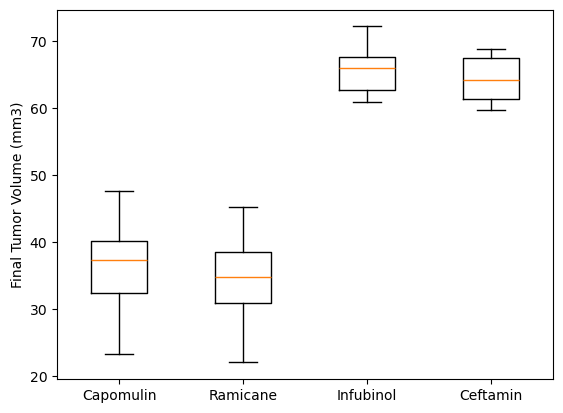

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_empty, labels= small_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

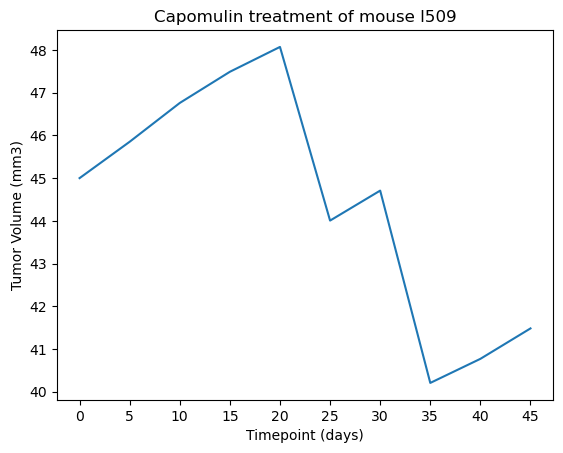

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
timepoint_plot = clean_mice.loc[(clean_mice["Mouse ID"]=="l509") & (clean_mice["Drug Regimen"]=="Capomulin"),"Timepoint"]
tumor_volume_plot = clean_mice.loc[(clean_mice["Mouse ID"]=="l509") & (clean_mice["Drug Regimen"]=="Capomulin"),"Tumor Volume (mm3)"]
plt.plot(timepoint_plot,tumor_volume_plot)
plt.xticks(timepoint_plot, rotation=0)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


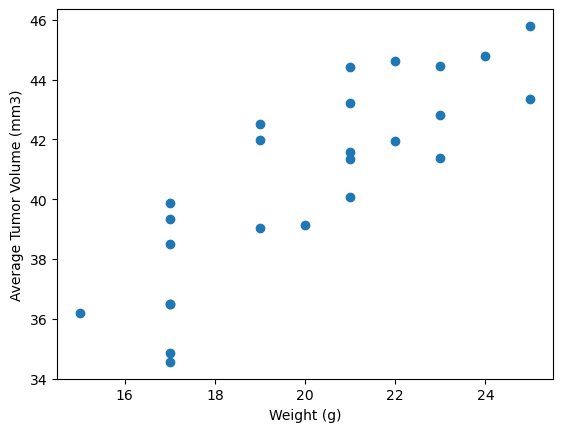

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

weight_plot = clean_mice.loc[(clean_mice["Drug Regimen"]=="Capomulin")]
set_miceweight = weight_plot.groupby('Mouse ID')
weight = set_miceweight['Weight (g)'].mean()

tumor_volume_plot_2 = clean_mice.loc[(clean_mice["Drug Regimen"]=="Capomulin")]
set_miceID = tumor_volume_plot_2.groupby('Mouse ID')
average_tumor = set_miceID['Tumor Volume (mm3)'].mean()


plt.scatter(weight,average_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


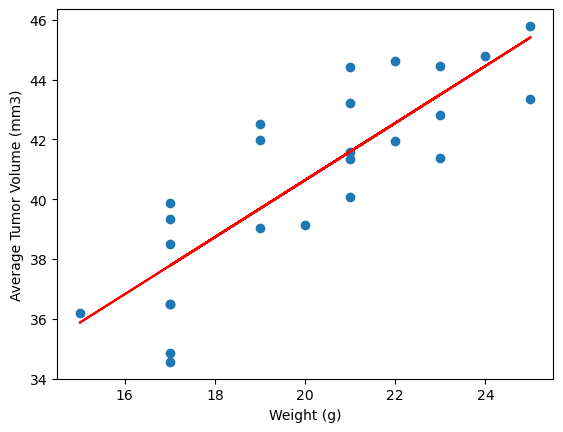

In [58]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

tw_slope, tw_int, tw_r, tw_p, tw_std_err = st.linregress(weight,average_tumor)
tw_fit = tw_slope * weight + tw_int

weight_plot = clean_mice.loc[(clean_mice["Drug Regimen"]=="Capomulin")]
set_miceweight = weight_plot.groupby('Mouse ID')
weight = set_miceweight['Weight (g)'].mean()

tumor_volume_plot_2 = clean_mice.loc[(clean_mice["Drug Regimen"]=="Capomulin")]
set_miceID = tumor_volume_plot_2.groupby('Mouse ID')
average_tumor = set_miceID['Tumor Volume (mm3)'].mean()


plt.scatter(weight,average_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation = st.pearsonr(weight,average_tumor)

plt.plot(weight,tw_fit, color='red')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()
